In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
import csv


# Read the contents of cleaned-data.txt
with open('cleaned-data.txt', 'r') as txt_file:
    lines = txt_file.readlines()

# Write the contents to cleaned-data.csv
with open('cleaned-data.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for line in lines:
        # Assuming the data in cleaned-data.txt is separated by spaces
        writer.writerow(line.strip().split())

In [45]:
def create_graph_from_csv(csv_file_path):
    import pandas as pd
    import networkx as nx

    # Read the CSV file
    data = pd.read_csv(csv_file_path)

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for index, row in data.iterrows():
        G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

    return G

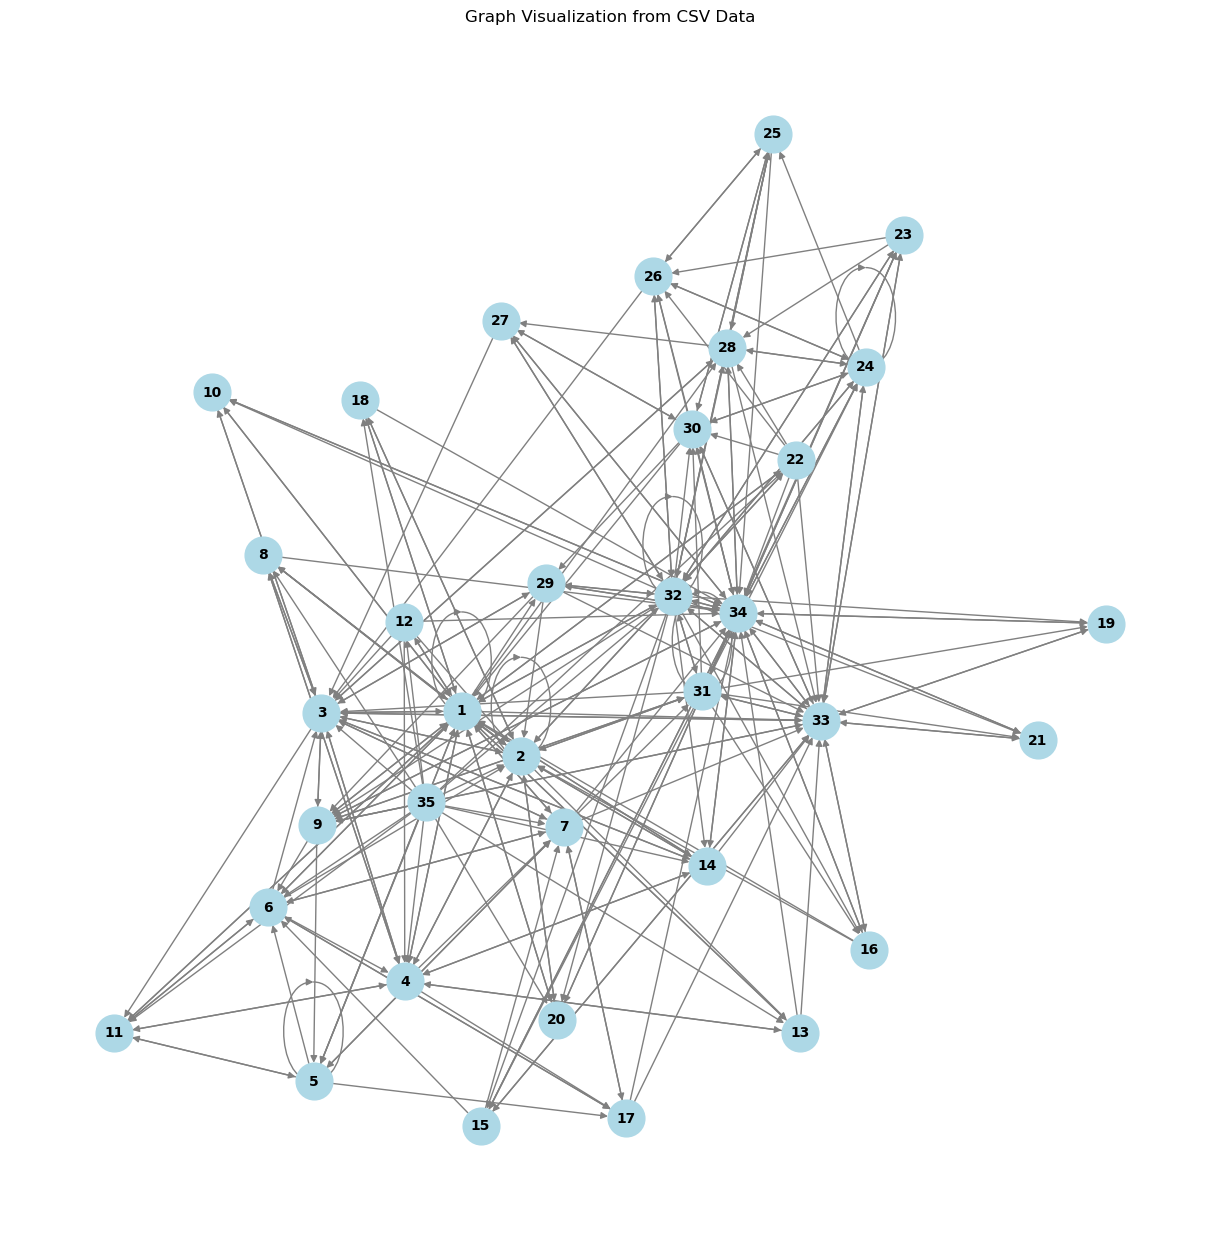

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'data.csv'

graph = create_graph_from_csv(csv_file_path)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Graph Visualization from CSV Data')
plt.show()




In [50]:
shortestpathdata = pd.DataFrame(columns=['Source', 'Target', 'ShortestPath'])
for source in graph.nodes():
    for dest in graph.nodes():
        # compute shortest path
        try :
            shortest_path_length = nx.shortest_path_length(graph, source=source, target=dest)
            
        except nx.NetworkXNoPath:
            shortest_path_length = -1

        finally: 
            shortestpathdata.loc[len(shortestpathdata)] = {'Source': source, 'Target': dest, 'ShortestPath': shortest_path_length}

shortestpathdata

,Source,Target,ShortestPath
0,1,1,0
1,1,2,1
2,1,3,1
3,1,4,1
4,1,5,1
...,...,...,...
1220,35,26,2
1221,35,30,2
1222,35,25,2
1223,35,27,2


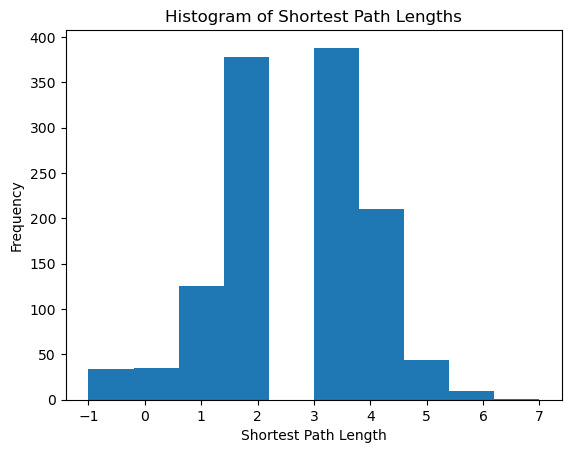

In [49]:
import matplotlib.pyplot as plt

# create histogram
plt.hist(shortestpathdata['ShortestPath'])
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Histogram of Shortest Path Lengths')
plt.show()
